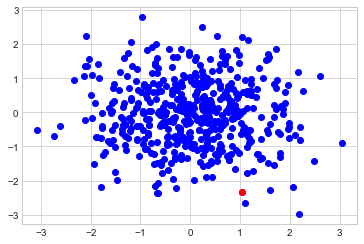

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from matplotlib import collections  as mc
plt.style.use('seaborn-whitegrid')
import pylab as pl

class Point():
    """
    Class contains all parameters to convert between coordinates and store coordiante values
    """
    
    def __init__(self, e, n, h = 0, std = [1,1], inProj = "E_N", outProj = "E_N"):
        """
        Desc:
        Input:
            E, easting or longitude
            N, northing or latitude
            H, height -- default 0
            std, the precision in easting, northing which will be used for point generation
            inProj, projection type being input, E_N if more for testing
            outProj, project output type if already known: can be modified
        Output:
        """
        self.e = e
        self.n = n
        self.h = h
        self.std = std
        self.inProj = inProj
        self.outProj = outProj
    
    def H(self):
        """
        Desc:
            returns height point
            this function is made for future projection checking
        Output:
            return --> self.H
        """
        return self.h
    
    def E(self):
        """
        Desc:
            returns Easting point
            this function is made for future projection checking
        Output:
            return --> self.E
        """
        return self.e
    
    def N(self):
        """
        Desc:
            returns Northing point
            this function is made for future projection checking
        Output:
            return --> self.N
        """
        return self.n
    
    def twoD(self):
        """
        Desc:
            returns [E, N] of the point
        Input: none
        Output
            return --> [self.E, self.N]
        """
        return [self.E(), self.N()]
    
    def threeD(self):
        """
        Desc:
            returns [E, N, H] of the point
        Input: none
        Output
            return --> [self.E(), self.N(), self.H()]
        """
        return [self.E(), self.N(), self.H()]
    
class PositionGenerator():
    """
    This class E and N generates positions based on std
    """
    
    def __init__(self, mean=Point(0,0), count = 1000):
        """
        Desc:
        Input:
            std, standard deviation [E, N]
            mean, [E, N]
            count, the number of points to generate
        """
        self.mean = mean
        self.count = count
        
        #generate base set of points
        self.generate()
    
    def generate(self, count = None):
        """
        Desc:
            Generates the points for future use or to be plotted
            **assumes normal distribution**
        Input:
            self.mean,
            count = self.count, incase the user wants to generate just 1 number -- must always be greater than zero
        Output:
            self.E_pnts, numpy array of easting coordinates
            self.N_pnts, numpy array of northing coords
        """
        if not count == None:
            self.count = count
        self.E_pnts = np.random.normal(self.mean.E(), self.mean.std[0], self.count)
        self.N_pnts = np.random.normal(self.mean.N(), self.mean.std[1], self.count)
        
    def plot(self, pick_one = False):
        """
        Desc:
            Plots all E and N points that have been generated on a 2D graph
        Input:
            self.N
            self.E
        Output:
            self.unique_pnt, Point() object of the first of the generated E and N coordinates
        """
        #check that there are points and equal lengths
        if self.N_pnts.shape == self.E_pnts.shape and self.N_pnts.shape[0] > 0:
            plt.scatter(self.E_pnts, self.N_pnts, color = 'b')
            
            if pick_one:
                #then we highlight and save one of the points
                #because its alread random we can just save the first one
                self.unique_pnt = Point(self.E_pnts[0],self.N_pnts[0])
                plt.scatter(self.unique_pnt.E(), self.unique_pnt.N(), color = 'r')
                

%matplotlib inline

PG = PositionGenerator(count = 500)
PG.plot(pick_one = True)